<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Advanced%20Deep%20Learning%20Course/Logistic_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.
## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

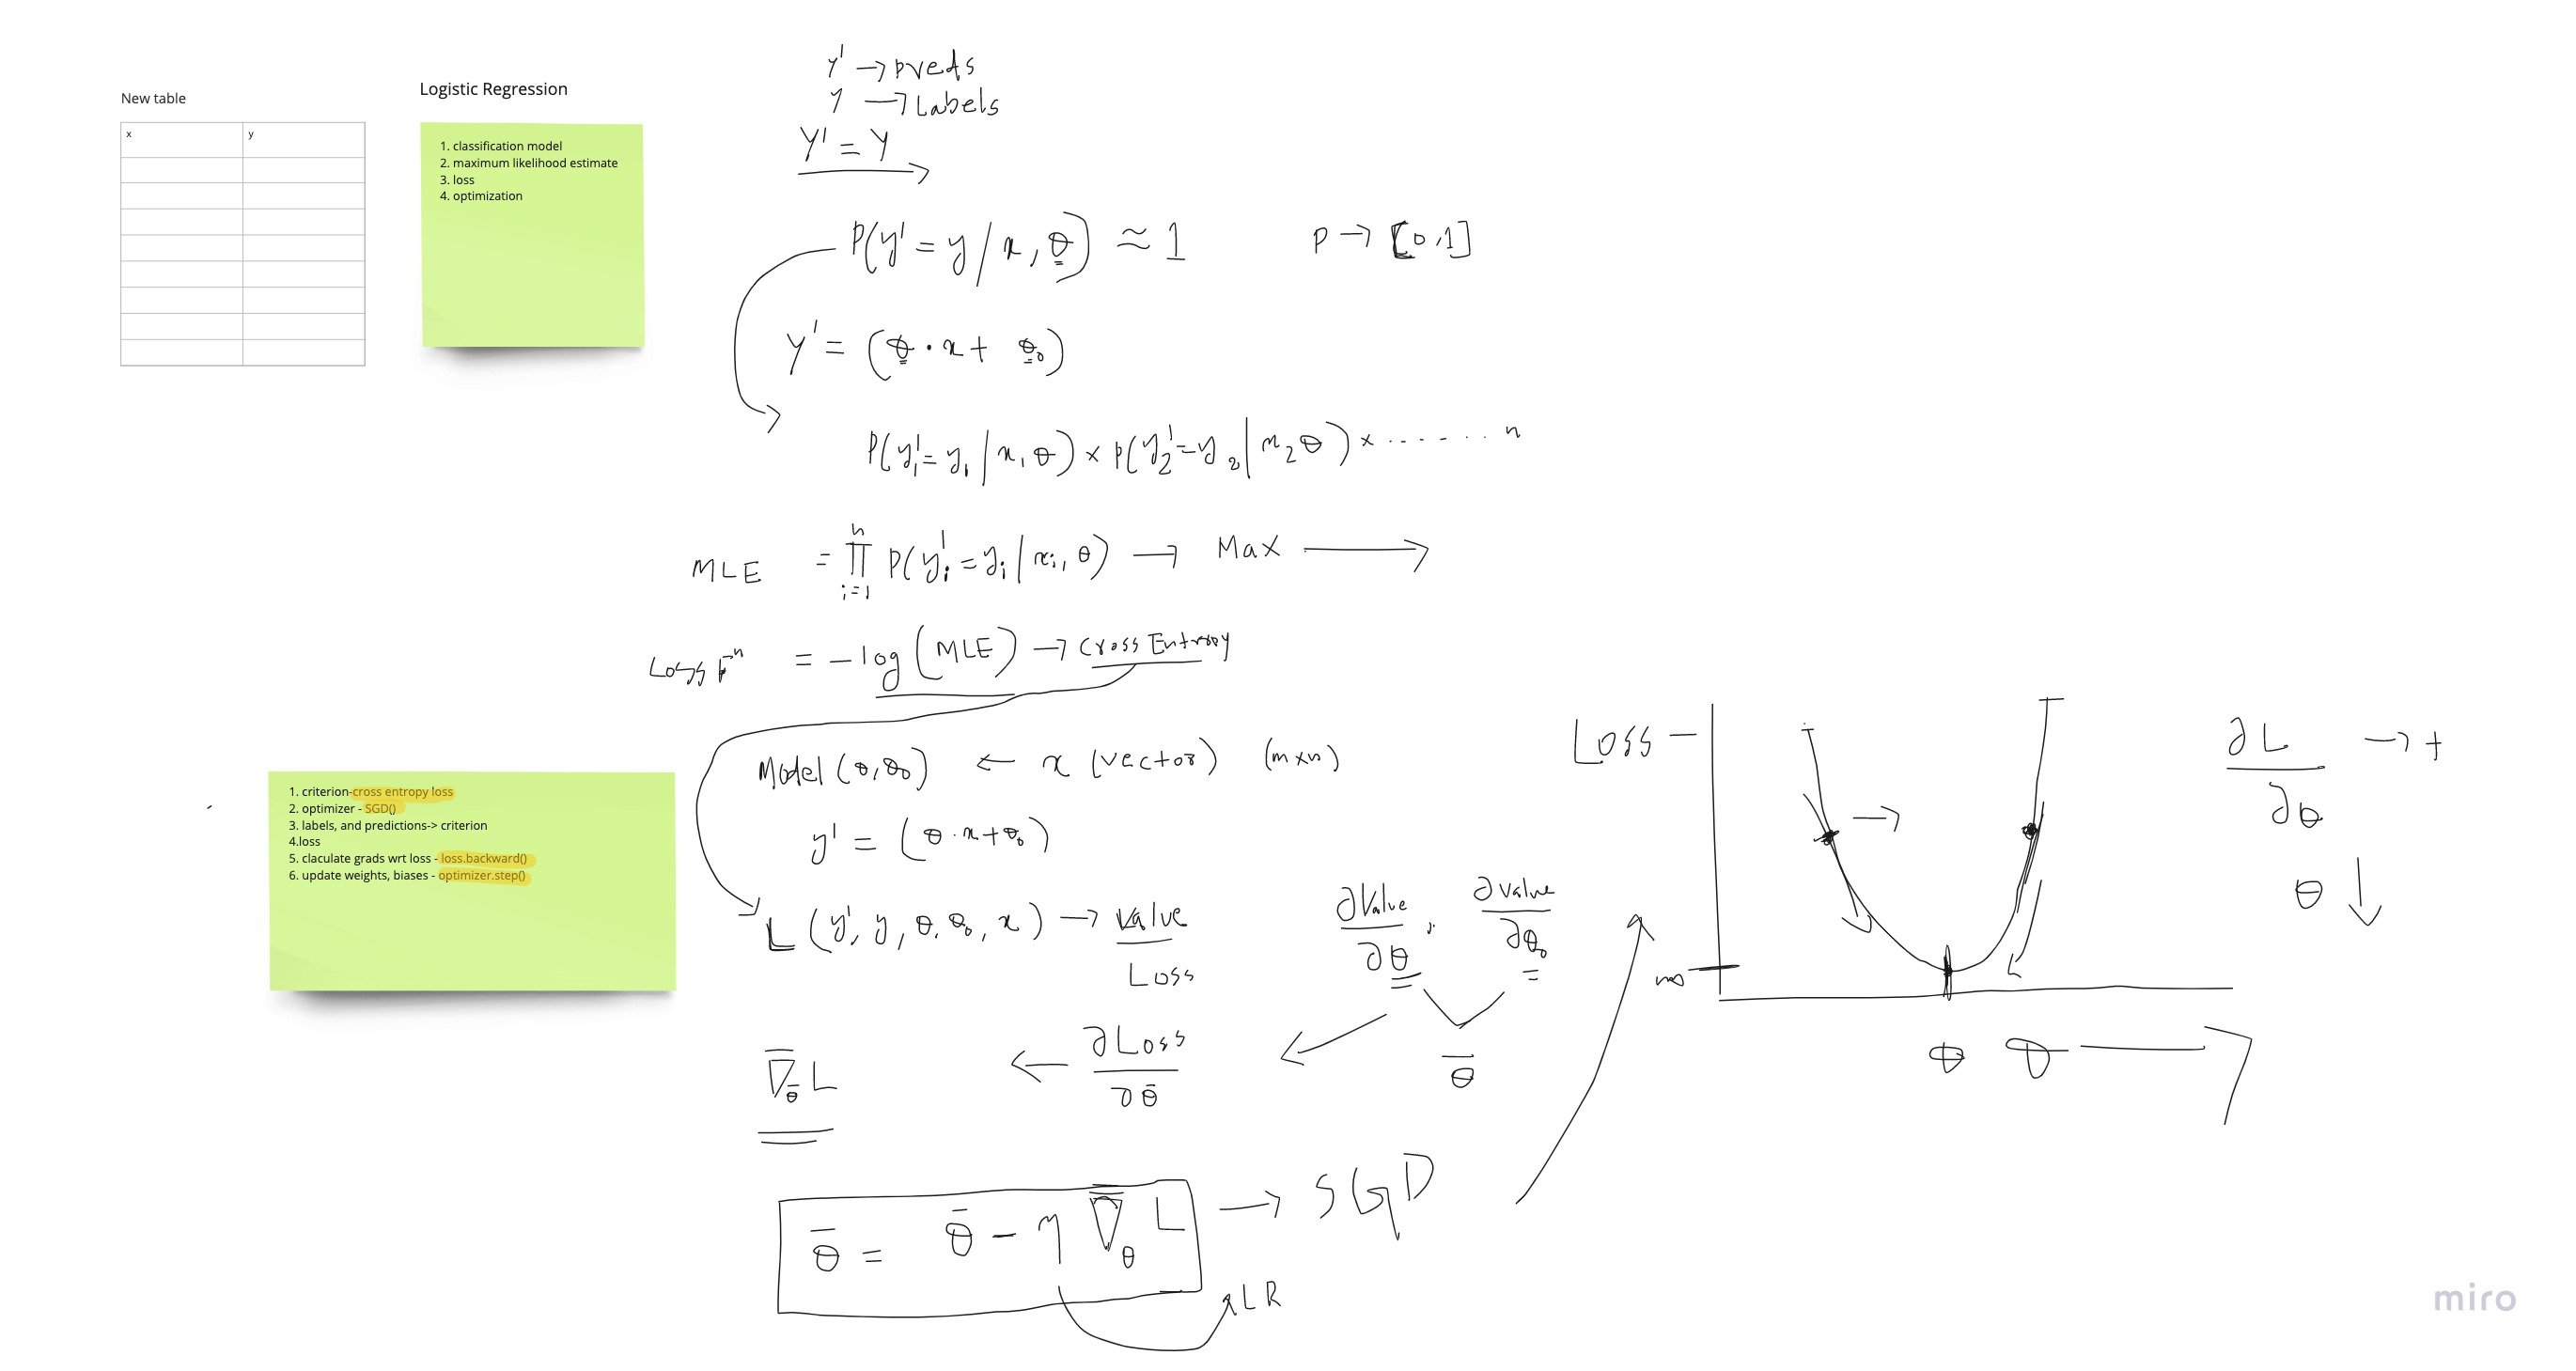

# <center> Image used in Video </center>

In [ ]:
# data
# preprocessing --
# data-loader
# model
# loss function -cross entropy loss
# optimizer
# loop training

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.optim import SGD

In [ ]:
# data import

data=pd.read_csv("winequality-red.csv")
data['quality']=data['quality']-3

In [ ]:

class Config:
    train_batch_size=10
    input_shape= 11
    hidden_shape= 20
    output_shape= 6
    lr=1e-5
    epochs=5

In [ ]:
# data-loader

class Dataset:
    def __init__(self,data):
        self.train_x=torch.tensor(data.drop('quality',axis=1,inplace=False).values,dtype=torch.float32)
        self.train_y=torch.tensor(data['quality'].values,dtype=torch.long) # torch.long is for training 
    
    def __len__(self):
        return len(self.train_x)
    
    def __getitem__(self,idx):
        return {
            'x':self.train_x[idx],
            'y':self.train_y[idx]
        }
wine_data=Dataset(data)
train_loader=DataLoader(wine_data,batch_size=Config.train_batch_size,shuffle=True)        

In [ ]:
# model
class Logistic_regression(nn.Module):
    def __init__(self,input_shape,hidden_shape,output_shape):
        super().__init__()
        self.Layers=nn.Sequential(
            nn.Linear(input_shape,hidden_shape),
            nn.Linear(hidden_shape,output_shape)
            
        )
    def forward(self,batch):
        return self.Layers(batch)


lr_model=Logistic_regression(Config.input_shape,Config.hidden_shape,Config.output_shape)
criterion=nn.CrossEntropyLoss()
optimizer=SGD(lr_model.parameters(),lr=Config.lr)


from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

def metrics(output,labels):
    preds=torch.argmax(torch.softmax(output.detach(),dim=-1),dim=-1)
    accuracy=accuracy_score(preds,labels)
    recall=recall_score(preds, labels,average='weighted')
    f1=f1_score(preds, labels,average='weighted')
    precision=precision_score(preds, labels,average='weighted')
    return accuracy,precision,recall,f1


for epoch in range(Config.epochs):
    total_loss=0
    for batch in train_loader:
        output=lr_model(batch['x'])
        loss=criterion(output,batch['y'])
        total_loss+=loss.item()
        loss.backward()
        optimizer.zero_grad()
        optimizer.step()
    avg_loss=total_loss/len(train_loader)
    print(avg_loss)

    # metrics(output,batch['y'])  #pass corresponding outputs and labels at any level to compute metrics

3.894214707612991
3.8957159489393236
3.894834402948618
3.892766585946083
3.8934235647320747
